In [1]:
from pylab import *
from numpy import *
from PIL import Image

from PCV.localdescriptors import sift

In [2]:
"""
The code from the book PDF does not work.
Cannot generate .sift file from process_image method
"""

"""
imname = './resources/empire.jpg'
im1 = array(Image.open(imname).convert('L'))
sift.process_image(imname, 'empire.sift')
l1, d1 = sift.read_features_from_file('empire.sift')

figure()
gray()
sift.plot_features(im1,l1,circle=True)
show()
"""

"\nimname = './resources/empire.jpg'\nim1 = array(Image.open(imname).convert('L'))\nsift.process_image(imname, 'empire.sift')\nl1, d1 = sift.read_features_from_file('empire.sift')\n\nfigure()\ngray()\nsift.plot_features(im1,l1,circle=True)\nshow()\n"

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

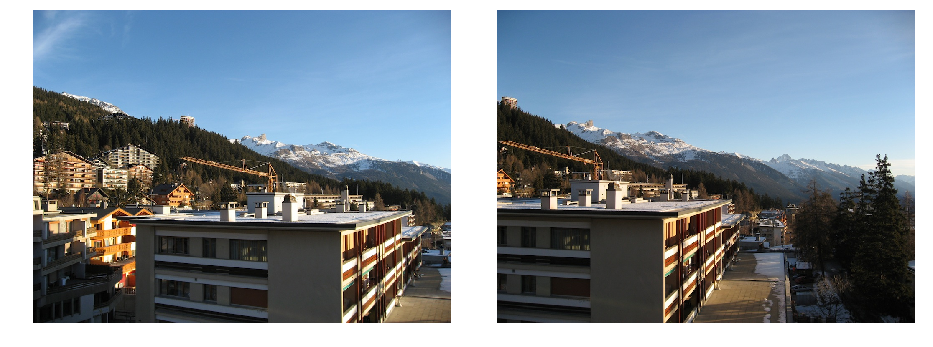

In [4]:
def show_rgb_img(img):
    plt.tight_layout()
    return plt.imshow(cv2.cvtColor(img, cv2.CV_32S))

image1 = cv2.imread('./resources/crans_1_small.jpg')
image2 = cv2.imread('./resources/crans_2_small.jpg')

fig = plt.figure(figsize=(13, 9))

fig.add_subplot(1,2,1)
plt.axis('off')
show_rgb_img(image1);

fig.add_subplot(1,2,2)
plt.axis('off')
show_rgb_img(image2);

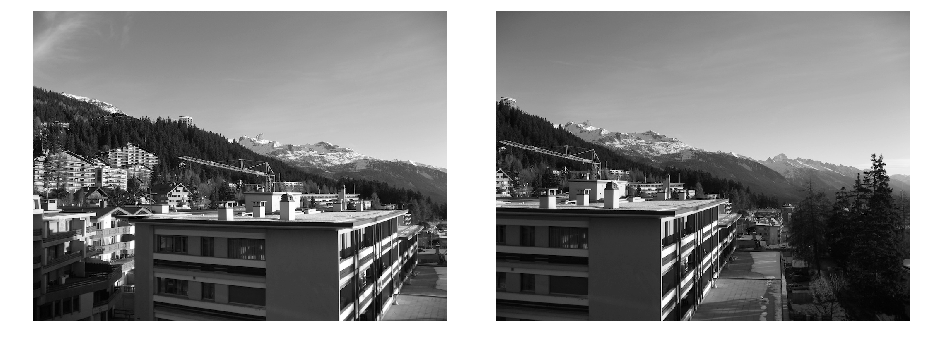

In [5]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

fig = plt.figure(figsize=(13, 9))

image1_gray = to_gray(image1)
image2_gray = to_gray(image2)

fig.add_subplot(1,2,1)
plt.axis('off')
plt.imshow(image1_gray, cmap='gray');

fig.add_subplot(1,2,2)
plt.axis('off')
plt.imshow(image2_gray, cmap='gray');

plt.tight_layout()

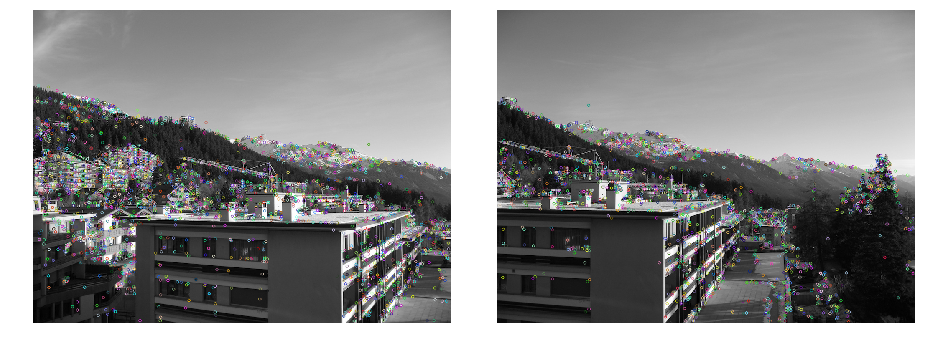

In [6]:
def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    plt.tight_layout()
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

fig = plt.figure(figsize=(13, 9))

# generate SIFT keypoints and descriptors
image1_kp, image1_desc = gen_sift_features(image1_gray)
image2_kp, image2_desc = gen_sift_features(image2_gray)

fig.add_subplot(1,2,1)
plt.axis('off')
show_sift_features(image1_gray, image1, image1_kp);

fig.add_subplot(1,2,2)
plt.axis('off')
show_sift_features(image2_gray, image2, image2_kp);

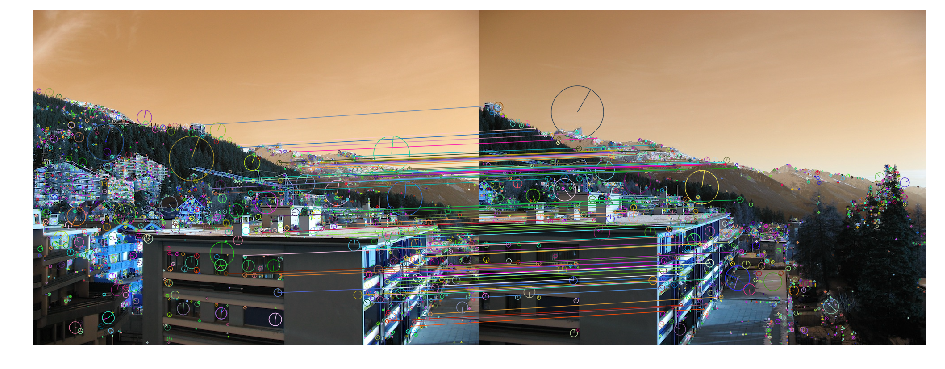

In [7]:
# create a BFMatcher object which will match up the SIFT features
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(image1_desc, image2_desc)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    image1, image1_kp,
    image2, image2_kp,
    matches[:N_MATCHES], -1, -1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig = plt.figure(figsize=(16, 9))

plt.axis('off')
plt.imshow(match_img);